Peer list
Node:  0  =  [5, 3, 8, 1, 2, 10, 13, 7, 14, 11]
Node:  1  =  [6, 19, 3, 18, 8, 12, 14, 5, 15, 4, 17, 0, 7, 13, 10]
Node:  2  =  [3, 6, 12, 19, 0, 8, 9, 17, 10, 13, 15, 11]
Node:  3  =  [17, 2, 5, 1, 0, 16, 12, 8, 9, 4, 15, 10, 7, 11]
Node:  4  =  [14, 5, 18, 12, 8, 19, 1, 13, 17, 3, 15, 6]
Node:  5  =  [14, 4, 3, 0, 6, 10, 1, 12, 19, 11, 15]
Node:  6  =  [1, 9, 11, 12, 5, 19, 15, 7, 2, 13, 4, 16]
Node:  7  =  [10, 14, 19, 8, 6, 12, 9, 1, 11, 0, 18, 3, 16, 13]
Node:  8  =  [14, 12, 7, 4, 1, 3, 18, 0, 9, 2, 10, 15]
Node:  9  =  [6, 16, 13, 8, 17, 7, 3, 2, 15, 14]
Node:  10  =  [7, 18, 16, 5, 14, 0, 3, 11, 2, 8, 1, 15]
Node:  11  =  [12, 6, 13, 17, 18, 19, 5, 7, 16, 10, 0, 3, 15, 2]
Node:  12  =  [11, 6, 8, 19, 4, 15, 1, 3, 2, 7, 16, 5, 14, 18]
Node:  13  =  [16, 11, 9, 15, 4, 6, 18, 0, 2, 1, 7]
Node:  14  =  [4, 5, 8, 17, 7, 10, 1, 16, 12, 0, 9, 18]
Node:  15  =  [12, 18, 6, 17, 1, 13, 3, 9, 4, 5, 2, 11, 8, 10]
Node:  16  =  [13, 9, 10, 3, 14, 12, 18, 11, 19, 6, 7]
Node:  17  =

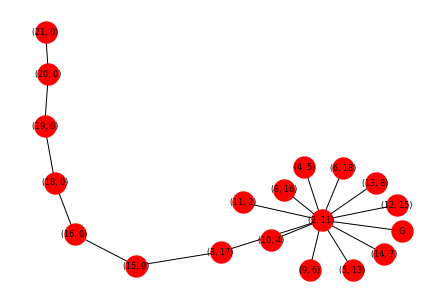

Block chain for node: 1


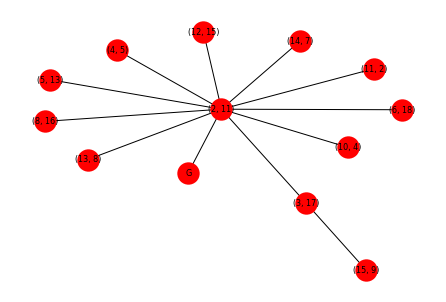

Block chain for node: 2


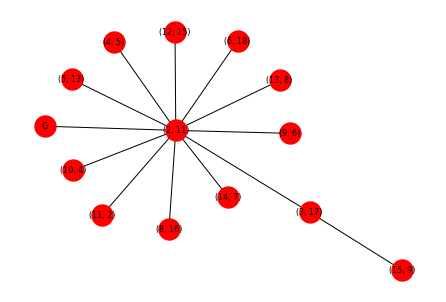

Block chain for node: 3


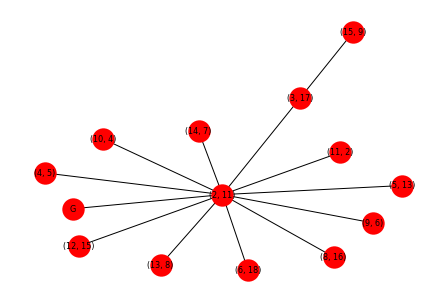

Block chain for node: 4


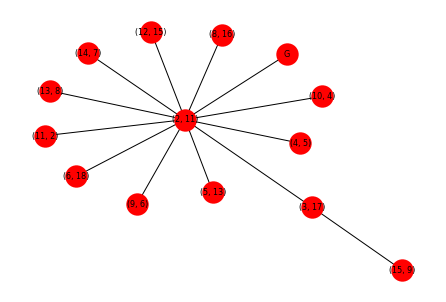

Block chain for node: 5


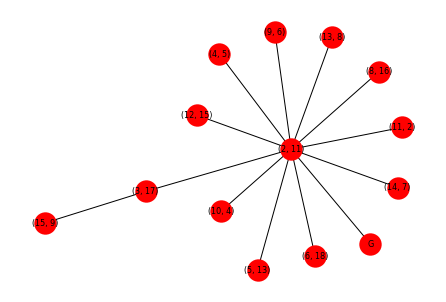

Block chain for node: 6


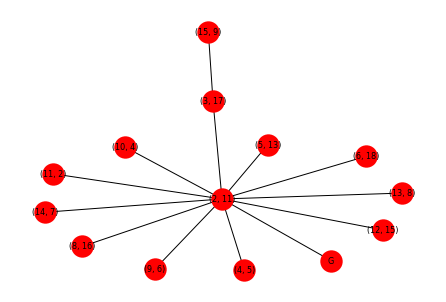

Block chain for node: 7


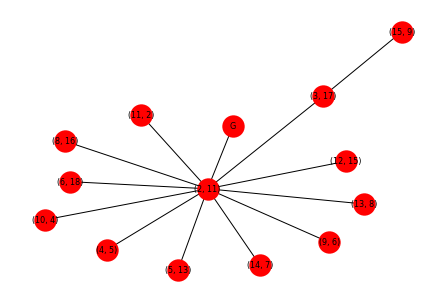

Block chain for node: 8


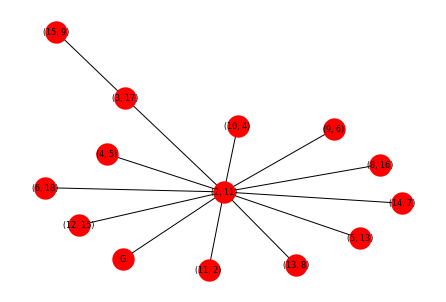

Block chain for node: 9


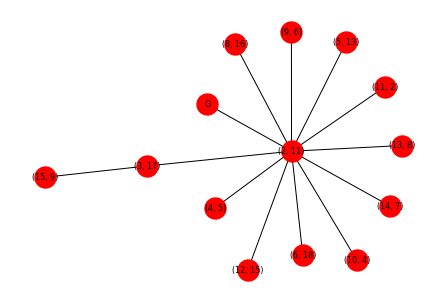

Block chain for node: 10


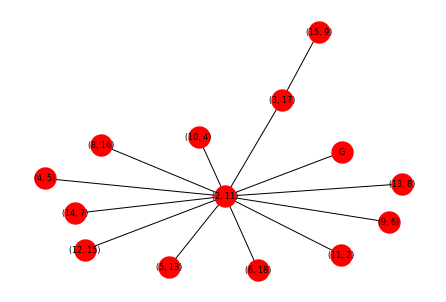

Block chain for node: 11


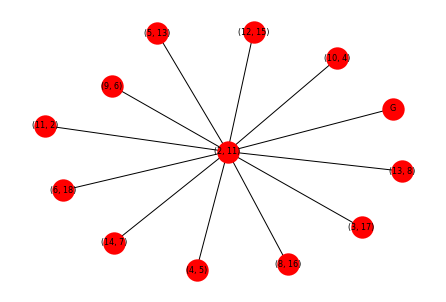

Block chain for node: 12


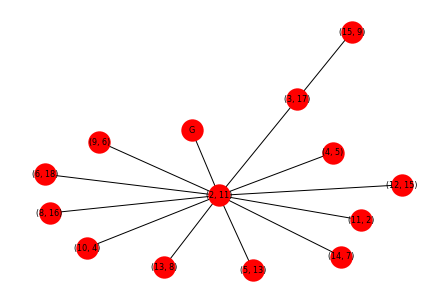

Block chain for node: 13


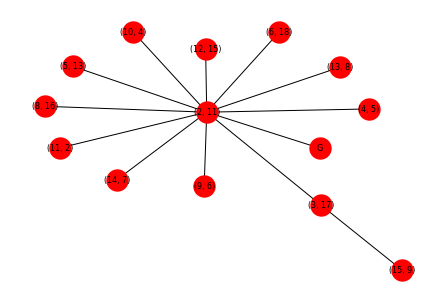

Block chain for node: 14


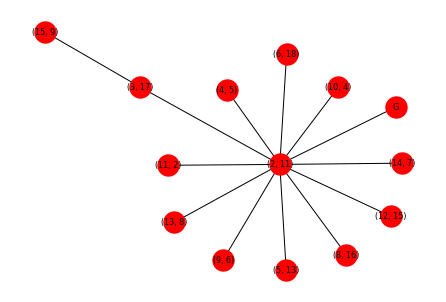

Block chain for node: 15


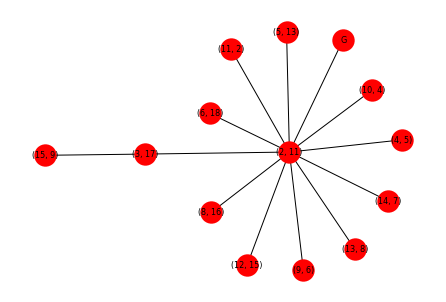

Block chain for node: 16


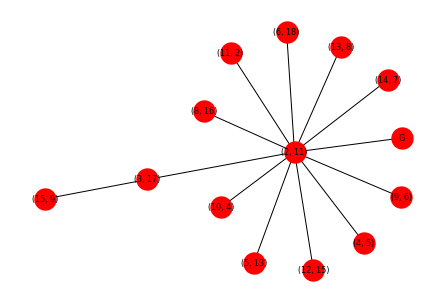

Block chain for node: 17


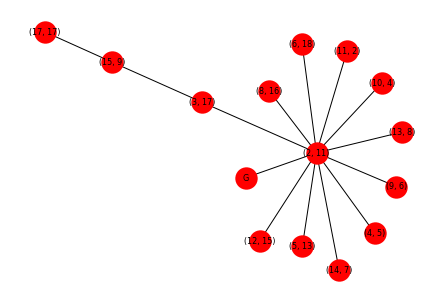

Block chain for node: 18


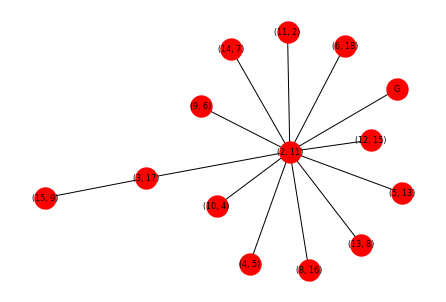

Block chain for node: 19


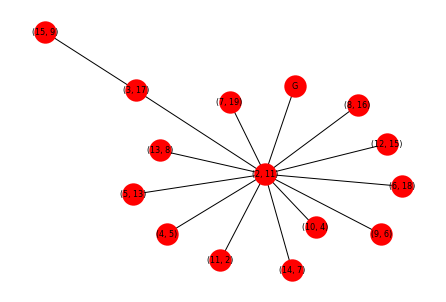


Longest chain for node: 0


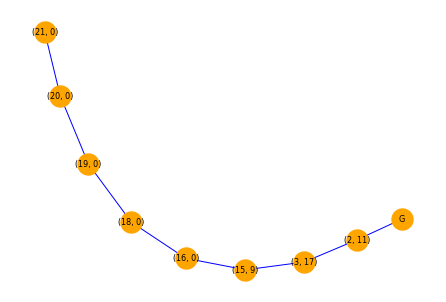

Longest chain for node: 1


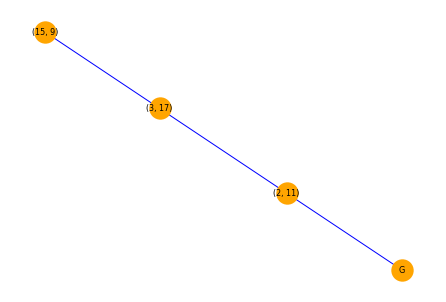



Longest chain for node: 2


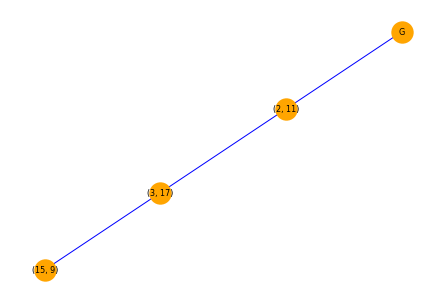


Longest chain for node: 3


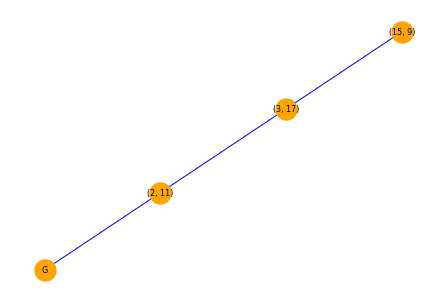


Longest chain for node: 4


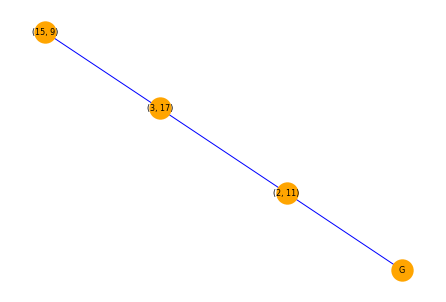




Longest chain for node: 5


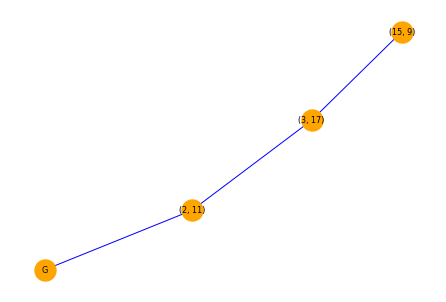






Longest chain for node: 6


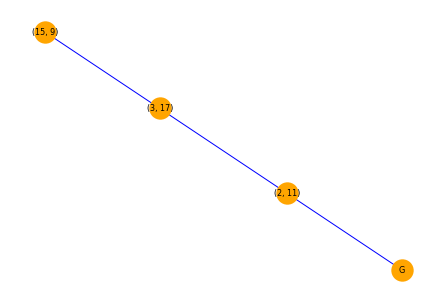



Longest chain for node: 7


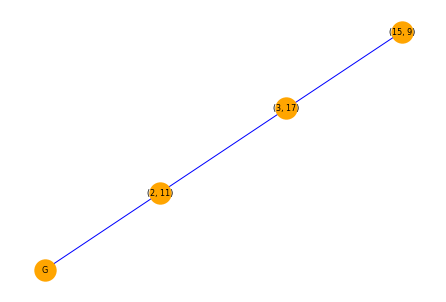




Longest chain for node: 8


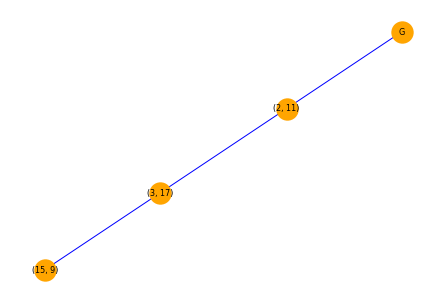










Longest chain for node: 9


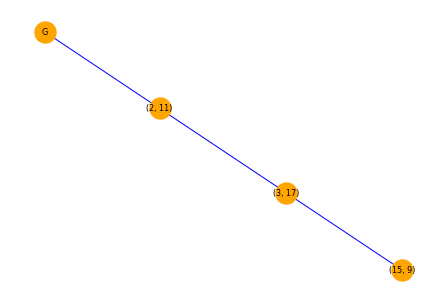


Longest chain for node: 10


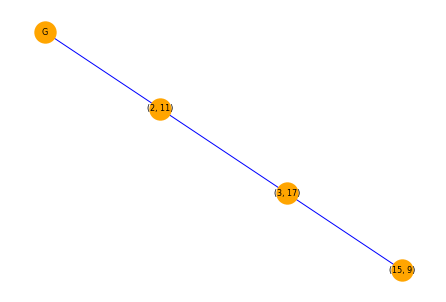

Longest chain for node: 11


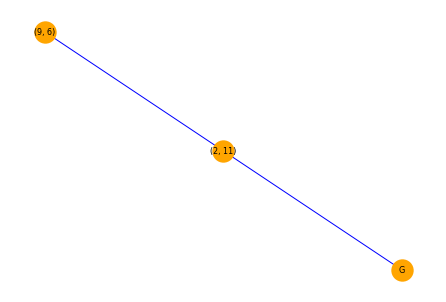

Longest chain for node: 12


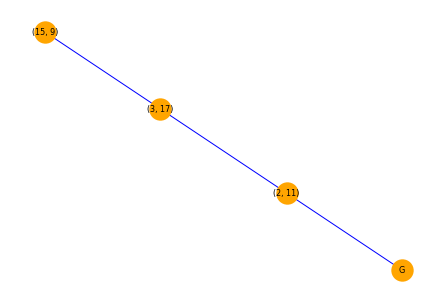

Longest chain for node: 13


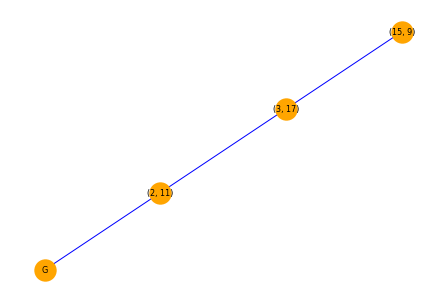


Longest chain for node: 14


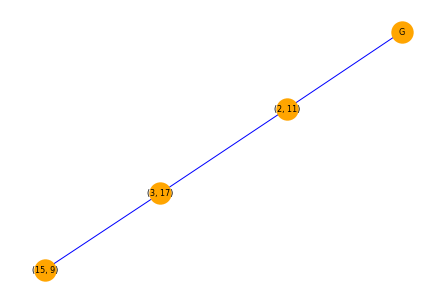



Longest chain for node: 15


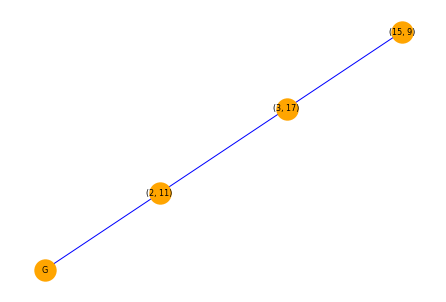

Longest chain for node: 16


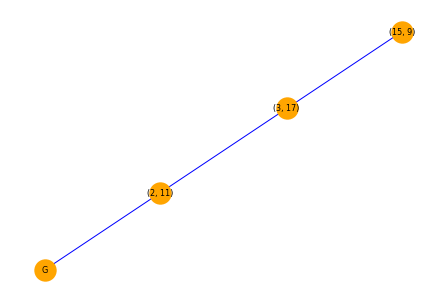




Longest chain for node: 17


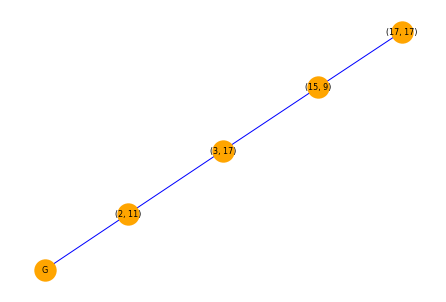

Longest chain for node: 18


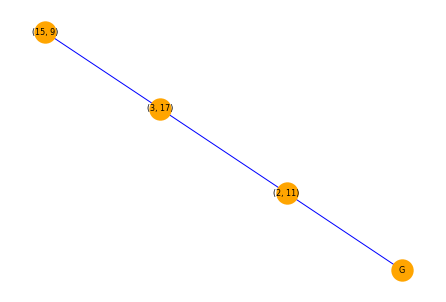

Longest chain for node: 19


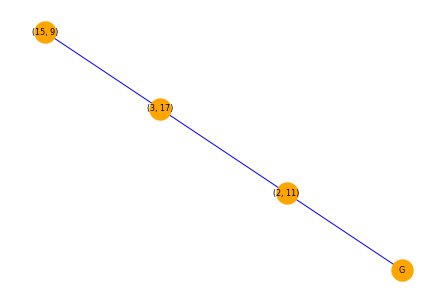

<Figure size 432x288 with 0 Axes>

In [6]:
##################################  Simulation of a P2P Cryptocurrency Network ############################################

# Team members:
# AKASH KUMAR (Roll number- 213050020)
# HRISHIKESH SALOI (Roll number- 213050057)
# MANOJ KUMAR MAURYA (Roll number- 213050067)

##########################################################################################################################

# importing some libraries in python

import networkx as nx
import math
import numpy as np
import time as tp
from time import time,ctime
import threading
import random
import os
from hashlib import sha256
import matplotlib.pyplot as plt

##########################################################################################################################

#Transaction class 
class Transaction(object):

    def __init__(self, txn_id, source, dest, money):

        self.id = txn_id  #Unique id for txn
        self.source = source  #Who pays in this txn
        self.dest = dest  #To whom the amount is paid to
        self.money = money  #How much amount is paid

#Block class
class Block:
    #transaction_size=10
    def __init__(self,block_id,creator,transactions,prev_block_id,prev_block,chain_len):
        self.block_id=block_id  #Unique Id for block
        self.creator=creator  #Who created this block
        self.transactions=transactions  #Transactions included in block
        self.timespamp=time()  #block created time
        self.prev_block_id=prev_block_id  #prev Block ID
        self.prev_block=prev_block  #prev Block
        if(self.block_id!=0):
            temp=self.prev_block
            self.prev_block_hash= sha256(str(temp).encode('utf-8')).hexdigest()
        else:
            self.prev_block_hash=None
        self.chain_len=chain_len  #Chain length of Block
        

class Blockchain:
    
    def __init__(self,creater):
        self.genesis=Block(0,creater,[],-1,None,0)  #created genesis block
        self.list_of_block=[]  #stores all blocks in the blockchain tree
        self.list_of_block.append(self.genesis)  #the list_of_blocks at index 0 stores genesis
       
    def last_block(self):
        return (list_of_block[-1])
    
    def add_block(Block):
        list_of_block.append(block)

    def block_list_len(self):  #number of blocks in blockchain
        return(len(list_of_block))


##########################################################################################################################    
    
# Some Inputs to be given for changing paramters to analyze properly
# (TO BE ENTERED BY USER)        
n=20  # Number of nodes
fast=10  # percentage of nodes which will be fast (ENTER BY USER)   
total_sim=100 # Number of events to be executed by each node
mining_fee=50  # mining fee to be given to honest miners
tk=40 #block_interarrival time mean
ttx=10 # txn_ intearrival time mean
min_txn_per_block=1  # We will create block only when atleast two blocks are present in block
max_txn_per_block=1023 #(max block size = 1 MB where empty block size = 1 KB and each TXN size is 1 KB), So max allowed txn inside block is 1023        


#queue= [ [ [t,obj,event id], [t,obj,event id], [t,obj,event id], [t,obj,event id] ] , [[t,obj,event id], [t,obj,event id]] , [[t,obj,event id], [t,obj,event id]] , [[t,obj,event id]] ]
queue=[]  #Queue at index i is the event queue of node i
queue_size=[]  #Queue size at index i is the number of events stored in node i event queue
blk_id=1
txn_id=1500

node_list=[]  #Nodelist at index i stores Node i (Node id is 0,1,..,n-1)
coins_list=[]  #Coins_list at index i stores coins owned by Node i


global c
c=1


# Node id= n-1 is an attacker and it always tries to do double spend attack

###########################################################################################################################

class Txn_gen:  #Event ID =1
    
    def __init__(self,node_id,timestamp,run_time):
        self.id=node_id  # Node id of node who will create txn
        self.timestamp=timestamp  # when the creation of txn started (event creation time)
        self.run_time=run_time  # when the txn is finally created (event execution time)
        
    def run(self):
        x=node_list[self.id]  # Node x will create txn
        
        if(x.coins[self.id]==0):  # Node x dont have any amount to create txn
            txn_int_time=x.txn_interarival_time()
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " does'nt have BTC to create transaction. so transaction generation rescheduled at " + ctime(self.run_time+txn_int_time) + os.linesep
            file1.write(s)
            file1.close()
            ev=Txn_gen(self.id,self.run_time,self.run_time+txn_int_time)
            put(self.id,[self.run_time+txn_int_time,ev,1])
            return
        
        dest=random.randrange(0,n)  # Whom to pay amount
        while(dest==self.id):  # Node x should not pay to himself
            dest=random.randrange(0,n)
        
    
        money=int(random.randrange(1,x.coins[self.id]+1))  # amount to pay
        new_money=x.coins[self.id]-money
        
        # Transaction created
        with lock:
            global txn_id
            txn_id+=1
            t=Transaction(txn_id,self.id,dest,money)
        
        # Transaction added to txn pool of node x
        x.transaction_pool.append(t)
        
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " creates transaction paying: " + str(money) + " Bitcoin to Node:" + str(dest) + os.linesep
        file1.write(s)
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " balance after deducting the money: " + str(new_money) + " BTC" + os.linesep
        file1.write(s)
        file1.close()
        
        #update Wallet of source and destination node
        x.coins[self.id]-=money
        x.coins[dest]+=money
        
        # Generates event txn receive by its connected peers. Event will reach the peer at time depending on latency between both node x and that peer
        for i in x.connected_peers:
            txn_travel_time=x.compute_txn_delay(node_list[i])
            ev=Txn_rec(t,i,self.run_time,self.run_time+txn_travel_time)
            put(i,[self.run_time+txn_travel_time,ev,2])
            
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates an event TXN REV by Node " + str(i) + os.linesep
            file1.write(s)
            file1.close()
        
        # Node x will again generate new TXN at time = present time + TXN_Interarrival_delay
        txn_int_time=x.txn_interarival_time()
        ev=Txn_gen(self.id,self.run_time,self.run_time+txn_int_time)
        put(self.id,[self.run_time+txn_int_time,ev,1])
        
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates an new event TXN GEN scheduled at : " + ctime(self.run_time+txn_int_time) + os.linesep
        file1.write(s)
        file1.close()
        
##########################################################################################################################        

class Txn_rec: #Event id=2
    def __init__(self,txn,node_id,timestamp,run_time):
        self.id=node_id  # Node id of node who will receive this txn
        self.timestamp=timestamp  # when the txn sent to this node (event creation time)
        self.run_time=run_time  # when the txn finally reached at this node (event execution time)
        self.txn=txn  # Transaction
        
    def run(self):
        x=node_list[self.id]  # Node x will receieve txn
        
        if self.txn in x.transaction_pool:  # If TXN already receieved then ignore this. Loopless broadcasting to prevent redundant txns
            return
        
        
        # If txn receieved is found that source dont have this much money. So invalid txn
        if x.coins[self.txn.source]<self.txn.money:
            return
        
        # Add this TXN in node x TXN pool
        x.transaction_pool.append(self.txn)
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " recieves transaction Node " + str(self.txn.source) + " paying: " + str(self.txn.money) + " Bitcoin to Node " + str(self.txn.dest) + os.linesep
        file1.write(s)
        file1.close()
        
        
        #Update Wallet of source and destination
        x.coins[self.txn.source]-=self.txn.money
        x.coins[self.txn.dest]+=self.txn.money
        

        # Generates event txn receive by its connected peers. Event will reach the peer at time depending on latency between both node x and that peer
        for i in x.connected_peers:
            txn_travel_time=x.compute_txn_delay(node_list[i])
            ev=Txn_rec(self.txn,i,self.run_time,self.run_time+txn_travel_time)
            put(i,[self.run_time+txn_travel_time,ev,2])
            
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates an event TXN REV by Node " + str(i) + os.linesep
            file1.write(s)
            file1.close()
        

##########################################################################################################################

class Block_gen: #Event id=3
    def __init__(self,node_id,timestamp,run_time,prev_blk):
        self.id=node_id  # Node id of node who will create block
        self.timestamp=timestamp  # when the mining of block started (event creation time)
        self.run_time=run_time  # when the block is finally created (event execution time)
        self.prev_blk=prev_blk  # prev block to the block under creation
        self.temp1_blk=prev_blk
        
    def run(self):
        x=node_list[self.id]  # Node x will create block
        
        txn_chain=[]
        
        # TXN_chain will have all txns in the chain of the previous block
        while self.temp1_blk.block_id > 0:
            for i in self.temp1_blk.transactions:
                txn_chain.append(i)
            self.temp1_blk=self.temp1_blk.prev_block
        
        # TXN_choice will have all txns we have as a choice to put inside the block by preventing double spend
        txn_choice=[]
        for i in x.transaction_pool:
            if(i not in txn_chain):
                txn_choice.append(i)
        
        # To not exceed maximum block size of 1 MB
        if(len(txn_choice)>max_txn_per_block):
            txn_choice=txn_choice[:max_txn_per_block]
        
        # Block should have this minimum no of txns set by USER (depends on user what should be minimum no of txns inside block)
        # if block does'nt have enough txns, then event rescheduled
        if(len(txn_choice)<min_txn_per_block):
            blk_int_time=x.blk_interarival_time()
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " does'nt have " + str(min_txn_per_block) +" txns to create block. so block generation rescheduled at " + ctime(self.run_time+blk_int_time) + os.linesep
            file1.write(s)
            file1.close()
            
            ev=Block_gen(self.id,self.run_time,self.run_time+blk_int_time,self.prev_blk)
            put(self.id,[self.run_time+blk_int_time,ev,3])
            return
        
        double_spt=0
        # Node id = n-1 is trying double spend
        if(self.id == n-1):
            if len(txn_chain)!=0:
                double_spt=1
                txn_choice.append(txn_chain[0])
        
        # Block created
        with lock:
            global blk_id
            blk_id=blk_id + 1
            b=Block(blk_id,self.id,txn_choice,self.prev_blk.block_id,self.prev_blk,(self.prev_blk.chain_len)+1)
        
        # If not a invalid block created then add mining fee to its account from thin air
        if double_spt==0:
            for i in node_list:
                i.coins[self.id]+=mining_fee
            
            
        #Block added into blockchain tree of node x    
        x.chain.list_of_block.append(b)
        x.block_timestamp.append(self.run_time)  # Stroring time when block added to blockchain
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + ":- block created with branch length " + str((self.prev_blk.chain_len)+1) + " and Mining fee added to its account" + os.linesep
        file1.write(s)
        file1.close()
        
        # Generates event Block receive by its connected peers. Event will reach the peer at time depending on latency between both node x and that peer   
        for i in x.connected_peers:
            blk_travel_time=x.compute_blk_delay(node_list[i],len(txn_choice))
            ev=Block_rec(b,i,self.run_time,self.run_time+blk_travel_time)
            put(i,[self.run_time+blk_travel_time,ev,4])
            
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates an event BLOCK REV by Node " + str(i) + os.linesep
            file1.write(s)
            file1.close()
        
        # Node x starts mining again. That is: it will again generate new Block at time = present time + TXN_Interarrival_delay
        blk_int_time=x.blk_interarival_time()
        ev=Block_gen(self.id,self.run_time,self.run_time+blk_int_time,b)
        put(self.id,[self.run_time+blk_int_time,ev,3])
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates BLOCK GEN event scheduled at " + ctime(self.run_time+blk_int_time) + os.linesep
        file1.write(s)
        file1.close()
            
            
##########################################################################################################################            
        
class Block_rec: #Event id=4
    def __init__(self,blk,id,timestamp,run_time):
        self.blk=blk
        self.id=id  # Node id of node who will receive block
        self.timestamp=timestamp  # when the of block sent to this node (event creation time)
        self.run_time=run_time  # when the block is finally receieved by this node (event execution time)
        
    def run(self):
        x=node_list[self.id]  # Node x will receive block
    
        if((self.blk in x.chain.list_of_block)):  # If Block already receieved then ignore this. Loopless broadcasting to prevent redundant blocks
            return
        
        flag1=0
        for i in x.chain.list_of_block:
            if self.blk.prev_block_id == i.block_id:
                flag1=1
        if(flag1==0):
            for i in x.par_list:
                if(i.block_id == self.blk.prev_block_id or i.prev_block_id == self.blk.block_id):
                    x.chain.list_of_block.append(i)
                    x.par_list.pop(x.par_list.index(i))
                    file1=open(list_of_files[self.id],'a') 
                    s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " recieves Block generated by " + str(i.creator) + os.linesep
                    file1.write(s)
                    file1.close()
                    flag1=1
            if flag1==0:
                x.par_list.append(self.blk)
                return
        
        
        # detecting double spend
        t=[]
        temp_block=self.blk.prev_block
        while(temp_block.block_id != 0):
            for s_txns in temp_block.transactions:
                t.append(s_txns)
            temp_block=temp_block.prev_block
        
        for s_txns in self.blk.transactions:
            if s_txns in t:
                file1=open(list_of_files[self.id],'a') 
                s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " recieves Block generated by " + str(self.blk.creator) + " !!!!! DOUBLE SPEND DETECTED !!!!! So Block Dropped" + os.linesep
                file1.write(s)
                file1.close()
                return  # If double spend detected then return
               
        
        # If received a block with an invalid transaction (transaction that have'nt been broadcasted)
        for i in self.blk.transactions:
            if i not in x.transaction_pool:
                return
        
        # Add recieved block to its blockchain
        x.chain.list_of_block.append(self.blk)
        x.block_timestamp.append(self.run_time)  # Stroring time when block added to blockchain
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " recieves Block generated by " + str(self.blk.creator) + os.linesep
        file1.write(s)
        file1.close()
        
        
        # If received block has longer chain length than the previous block's chain length, the node was mining. Node x shifts mining to this longer chain
        rec_len=self.blk.chain_len
              
        flag=pop_blk_gen_event(self.id,rec_len)
        if(flag==1):
            blk_int_time=x.compute_Tk(x.cpu)
            ev=Block_gen(self.id,self.run_time,self.run_time+blk_int_time,self.blk) 
            put(self.id,[self.run_time+blk_int_time,ev,3])
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " Block recieved have longer chain length. So it leaves mining on previos block and generates BLOCK GEN event on this block recieved, scheduled at " + ctime(self.run_time+blk_int_time) + os.linesep
            file1.write(s)
            file1.close()
        
    
        # Generates event Block receive by its connected peers. Event will reach the peer at time depending on latency between both node x and that peer
        for i in x.connected_peers:
            blk_travel_time=x.compute_blk_delay(node_list[i],len(self.blk.transactions))
            
            ev=Block_rec(self.blk,i,self.run_time,self.run_time+blk_travel_time)
            put(i,[self.run_time+blk_travel_time,ev,4])
            file1=open(list_of_files[self.id],'a') 
            s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " generates an event BLOCK REV by Node " + str(i) + os.linesep
            file1.write(s)
            file1.close()
    
##########################################################################################################################

def put(index,obj_list):  # Adding event into event queue of node id = index 
    with lock:
        queue[index].append([])
        i = queue_size[index] - 1
        while i >= 0 and queue[index][i][0] > obj_list[0]:
            queue[index][i + 1] = queue[index][i]
            i -= 1
        queue[index][i + 1] = obj_list
        queue_size[index]+=1 
    
    
def get(index):  # Popping out event from the event queue when its execution time comes
    with lock:
        ele=queue[index].pop(0)
        queue_size[index]-=1
        return ele[1]
    

def pop_blk_gen_event(index,rec_len):  # If node who receieves block having longer chain than what it was mining, it shifts mining to the new chain
    with lock:
        for i in queue[index]:
            if i[2]==3:
                if i[1].prev_blk.chain_len < rec_len:
                    queue[index].pop(queue[index].index(i))
                    queue_size[index]-=1
                    return 1
        return 0

##########################################################################################################################

class Node:
    
    def __init__(self, node_id, is_fast, peers,coins1,cpu):
        
        self.id = node_id  # Node id
        self.coins=[]  # coins at index i have no of coins owned by node i
        for i in coins1:
            self.coins.append(i)
        
        file1=open(list_of_files[self.id],'a') 
        s="Time: " + ctime(time()) + " :- Node:" + str(self.id) + " Balance: " + str(self.coins[self.id]) + " BTC" + os.linesep
        file1.write(s)
        file1.close()
        
        self.is_fast = is_fast  # Is this node fast
        self.cpu=cpu
        self.chain=Blockchain(self.id)  # chain is the blockchain tree of this node
        self.par_list=[]
        self.block_timestamp=[]
        self.block_timestamp.append(time())
        
        self.connected_peers = peers  # Adjacent peers of this node
        
        queue.append([])  # Creating its own event queue at index = node id
        queue_size.append(0)  # Initally the event queue is empty
        
        self.transaction_pool = []  # list of transactions node has created+received
        
        self.counter=0  # How many events do we simulate for this node
        
        
    # Assuming length of genesis to be 0
    # Returns longest chain from the blockchain tree
    def longest_chain(self):
       
        longest_chain = []  # will store the longest chain

        max_length=0
        max_length_block=self.chain.genesis
        
        for blk in self.chain.list_of_block:
            if blk != self.chain.genesis:
                if(blk.chain_len > max_length):
                    max_length=blk.chain_len
                    max_length_block=blk
                elif(blk.chain_len < max_length):
                    print("")
                else:
                    #latest block will be destinated to create block. As miner mines in latest block having longer chain
                    if(self.chain.list_of_block.index(blk) > self.chain.list_of_block.index(max_length_block)):
                        max_length=blk.chain_len
                        max_length_block=blk
                    
        
        temp=max_length_block
        
        while(temp.block_id != 0):
            longest_chain.append(temp)
            temp=temp.prev_block
        longest_chain.append(self.chain.genesis)
            

        return longest_chain
  
    # Computing TXN latency between node(self) and its peer(other)
    def compute_txn_delay(self,other):
        pij=(np.random.uniform(10,500))/1000  #generate a uniform prop delay(10,500)
        size_m=1*(8192)       #size of txn is 1Kb
        if (self.is_fast==other.is_fast==True):
            cij=100*(pow(10,6))  # 100Mbps
        else:
            cij=5*(pow(10,6)) #5Mbps
        mean=(96*pow(10,3))/cij
        dij=random.expovariate(1/mean)
        delay=pij+(size_m/cij)+dij
        return delay
    
    # Computing Block latency between node(self) and its peer(other)
    def compute_blk_delay(self,other,size):
        pij=(np.random.uniform(10,500))/1000  #generate a uniform prop delay(10,500)
        size_m=(size*8192)+8192      #size of txn is bits (1 txn = 1 KB = 8192 bits)+(empty block size=1 KB= 8192 bits)
        if (self.is_fast==other.is_fast==True):
            cij=100*(pow(10,6))  # 100Mbps
        else:
            cij=5*(pow(10,6)) #5Mbps
        mean=(96*pow(10,3))/cij
        dij=random.expovariate(1/mean)
        delay=pij+(size_m/cij)+dij
        return delay
    
    # computing TXN interarrival time (from exponential distribution)
    def txn_interarival_time(self):
        return(random.expovariate(1/ttx))          #ttx=mean inter-arrival time 
    
    # computing Block interarrival time (from exponential distribution)
    def blk_interarival_time(self):
        return(random.expovariate(1/tk))           #tk=mean interarrival time for block
    
    # computing Tk
    def compute_Tk(self,hash_power):
        meanTk=1/tk
        lam=(hash_power*meanTk)
        delay=random.expovariate(1/(lam*100))
        return delay


    # Event Simulation starts
    def run(self):
        # Generates event TXN generate
        txn_int_time=self.txn_interarival_time()
        t=time()+txn_int_time
        ev=Txn_gen(self.id,time(),t)
        put(self.id,[t,ev,1])
        
        file1=open(list_of_files[self.id],'a') 
        s=" Node:" + str(self.id) + " generates event TXN GEN scheduled at : " + ctime(t) + os.linesep
        file1.write(s)
        file1.close()
        
        # Generates event Block generate
        blk_int_time=self.blk_interarival_time()
        t=time()+blk_int_time
        ev=Block_gen(self.id,time(),t,self.chain.genesis)
        put(self.id,[t,ev,3])
        
        file1=open(list_of_files[self.id],'a') 
        s=" Node:" + str(self.id) + " generates BLOCK GEN event scheduled at " + ctime(t) + os.linesep
        file1.write(s)
        file1.close()
            
        
        while(self.counter<=total_sim):  # running the events
            if(queue_size[self.id]>0 and queue[self.id][0][0]<=time()):
                t=get(self.id)  
                t.run()
                self.counter+=1

                
        
#############################################################################################    

list_of_files=[]

#lets create a random connected graph
max_edge=(n*(n-1))/2 
random.seed(100)#maximum edge in a undirected graph
num_edge=np.random.randint(n-1,max_edge+1) #generates a random number of edges
G=nx.gnm_random_graph(n,num_edge) #this generates a random connected graph
#nx.draw(G,with_labels=True, font_weight='bold')


# converting fast from percentage to number of fast blocks in our network
fast=fast/100
fast=math.floor(n*fast)


print("Peer list")
for i in range(n):
    print("Node: ",i," = ",list(G.neighbors(i)))

# Creating log files with details
for i in range(n):
    s=str(i)+".txt"
    if os.path.exists(s):
        os.remove(s)
    list_of_files.append(s)

# creating coins for each node    
for i in range(n): 
    coins_list.append(random.randrange(20, 40))

print("Coins list: ",coins_list)
    
# Creating Nodes
for i in range(n): 
    if i < fast:
        f=True
    else:
        f=False
    if i==0:
        cpu=0.4
    else:
        cpu=(0.6)/(n-1)
    node_list.append(Node(i,f,list(G.neighbors(i)),coins_list,cpu))


tp.sleep(5)

thread=[]  # Thread at index i  will have node i thread

lock = threading.Lock()  # To implement concurrency control used for Critical section in threads

# Creating threads
for i in range(n):
    thread.append(threading.Thread(target=node_list[i].run))

# Start the execution of threads
for i in range(n):
    thread[i].start()
    
# Main program waits for all threads to complete execution
for i in range(n):
    thread[i].join()
    
print("###########   Simulation Ends   ############")


##########################################################################################################################



#Plotting the blockchain of each node   (a,b) where a=block_id ,b= creator of the block


for i in range(n):
    tree=node_list[i].chain.list_of_block
    T=nx.Graph()
    T.add_nodes_from(tree)
    l=len(tree)
    labeldict = {}
    for k in range(0,l):
        if(k==0):
            labeldict[tree[k]] = 'G'
        else:
            labeldict[tree[k]] = (tree[k].block_id,tree[k].creator)

    
    for j in range(1,len(tree)):
        if(tree[j].prev_block.block_id==0):
            T.add_edge(tree[j],tree[0])
        else:
            T.add_edge(tree[j],tree[j].prev_block)
    
    print('Block chain for node:',i)
    my_pos = nx.spring_layout(T)
    nx.draw(T, pos = my_pos, labels=labeldict, node_color='red', node_size=500, edge_color='black', linewidths=0.01, font_size=8)
    sr = 'blockchaintree_' +f'{i}'+'.png'
    plt.savefig(sr)
    plt.show()
    # clearing the current plot
    plt.clf()

#Ploting the longest chain of each node   (a,b) where a=block_id ,b= creator of the block    
    
for i in range(n):
    s=(node_list[i].longest_chain())
    l=len(s)
    L_C=nx.Graph() #longest Chain
    L_C.add_nodes_from(s)
    for j in range(l-1):
        e = (s[j],s[j+1])
        L_C.add_edge(*e)
    labeldict = {}
    for k in range(0,l):
        if(k==l-1):
            labeldict[s[k]] = 'G'
        else:
            labeldict[s[k]] = (s[k].block_id,s[k].creator)
    my_pos = nx.spring_layout(L_C)
    nx.draw(L_C, pos = my_pos, labels=labeldict, node_color='orange', node_size=500, edge_color='blue', linewidths=0.01, font_size=8)
    sr = 'longest_chain_' +f'{i}'+'.png'
    plt.savefig(sr)
    print('Longest chain for node:',i)
    plt.show()
    # clearing the current plot
    plt.clf()
 
